# Support Vector Machines - Exercices tirés du MOOC d'Andrew Ng

Voici une adaptation en Python de l'exercice de programmation de la 7e semaine du cours Machine Learning d'Andrew Ng, disponible sur [Coursera](https://www.coursera.org/learn/machine-learning).
Voir [l'énoncé original](https://github.com/42-AI/ateliers-ml-2018/blob/master/Semaine-4/Sujet.pdf) de l'exercice pour le détail des instructions et un rappel des équations à utiliser.

Cet exercice, nous utiliserons les SVMs sur trois jeux de données différents pour comprendre comment ils fonctionnent.

# 0- Sondage pour le challenge Kaggle 

@Btollie et @trmonich vous proposent une activité autour du challenge Kaggle du Titanic qui va littéralement changer votre vie.

Remplissez le sondage suivant pour les aider à l'organiser.

https://docs.google.com/forms/d/e/1FAIpQLSfkQDNg7sf24fCm15wCq_q4AtvLDwfv5sNlyTIWRRqa-BNhrQ/viewform?usp=sf_link

## 1- Expérimentations avec les Support Vector Machines

Ici, nous utiliserons un jeu de données simple à deux dimensions dont les données peuvent être séparées par une frontière de décision linéaire. L'idée ici est de comprendre comment le paramètre **C** influence cette frontière de décision.

### Chargement des données

Les données sont en format matlab, donc nous utiliserons ici une fonction de scipy pour les ouvrir.

In [4]:
from scipy.io import loadmat
raw_data = loadmat('ex6data1.mat')

Cool... mais elles ont quel format? Et quel type a la variable *raw_data* ? Il serait important de voir cela pour savoir quelles manipulations sont possibles avec la structure de données qui y est associée.

In [5]:
raw_data.keys()


dict_keys(['__header__', '__version__', '__globals__', 'X', 'y'])

### Transformation de *raw_data* en un format moins ésotérique...

Transférez les données dans un DataFrame pandas (appelé *data*) qui aura trois colonnes apppelées X1, X2, y

In [6]:
import numpy as np
x = np.array(raw_data['X'])
y = np.array(raw_data['y'])
y.shape #ATTENTION sous numpy avec calcul matricile, un vecteur unicolonne est equ a un vecteur uniligne.
#Un vecteur unicolonne levera une erreur, si 1D => ligne

(51, 1)

In [7]:
import pandas as pd
data = pd.DataFrame({'X1':raw_data['X'][:,0], 'X2':raw_data['X'][:,-1], 'y':raw_data['y'].reshape(-1)})
data.head()


,X1,X2,y
0,1.9643,4.5957,1
1,2.2753,3.8589,1
2,2.9781,4.5651,1
3,2.9320,3.5519,1
4,3.5772,2.8560,1


In [8]:
data['y'].shape

(51,)

### Visualisation des données

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

La visualisation se fera en nuage de points.
Séparez les rangées de votre DataFrame afin de séparer les exemples "positif" de ceux qui sont marqués "négatifs" (i.e. marqués respectivement d'un 1 ou d'un 0 dans la colonne y).

In [10]:
positive = data[data['y'] == 1]
negative = data[data['y'] == 0]

Si vous avez bien réussi, vous devriez obtenir un graphe qui ressemble à celui du PDF.

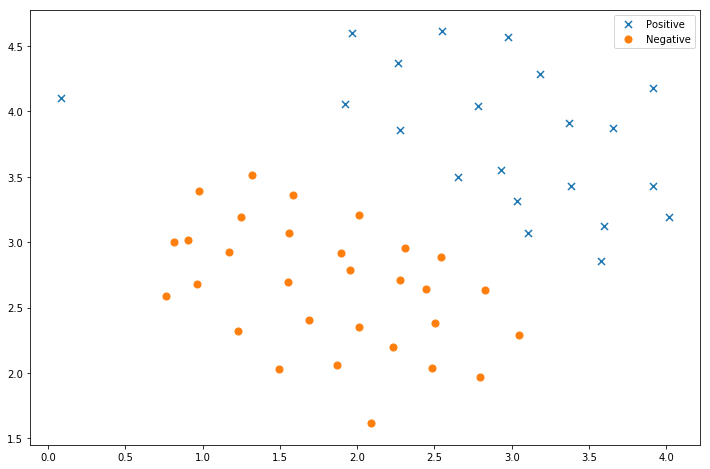

In [11]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=50, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=50, marker='o', label='Negative')
ax.legend()

À noter la présence d'un *x* aberrant sur la gauche. Nous verrons comment il affectera la frontière de décision selon les paramètres qui seront passés au classifieur SVM.

### Entraînement du classifieur SVM

Nous allons pour la première fois utilier la bibliothèque Scikit Learn.
Pour ce premier exercice, le modèle LinearSVC suffira. Les paramètres du constructeur peuvent être laissés par défaut, sauf *C* et *loss* que vous devez sélectionner de manière appropriée.

**1- Créez et entraînez un classifieur qui aura la valeur de C par défaut, et que vous assignerez à la variable *svc***

In [12]:
from sklearn import svm
svc = svm.LinearSVC()


Entraînez-le

In [13]:
svc.fit(data[['X1','X2']],data['y'])

LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=1000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Mesurez l'exactitude de ses prédictions sur les données d'entraînement.

In [14]:
svc.score(data[['X1','X2']],data['y'])

0.9803921568627451

In [15]:
theta1 = svc.coef_
theta1 = np.c_[svc.intercept_, theta1].reshape(-1)
theta1

array([-3.56318626,  0.44887484,  0.76398413])

L'exactitude est-elle de 100% ? Le classifieur semble avoir raté son coup pour au moins un exemple... 
Comment faire pour qu'il soit juste pour tous les exemples?

impossibilité de classer parfaitement les data lineairement car un outlier.
On va detendre un peu la contrainte de dire que tous les data points doivent etre en dehors des marges.
Ainsi, on va augmenter C pour 

**2- Créez et entraînez un deuxième classifieur, qui ne laissera pas le moindre exemple mal classé! Vous l'appellerez *svc2***

In [16]:
svc2 = svm.LinearSVC(C=100.0, max_iter=10000)

In [17]:
svc2.fit(data[['X1','X2']],data['y'])

/Users/gvannest/ENVS/data_science/lib/python3.7/site-packages/sklearn/svm/base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=100.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=10000,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

Mesurez son exactitude. Est-elle de 100% maintenant?

In [18]:
svc2.score(data[['X1','X2']],data['y'])

1.0

In [19]:
theta2 = svc2.coef_
theta2 = np.c_[svc2.intercept_, theta2].reshape(-1)
theta2

array([-16.15338448,   1.50697401,   3.94278314])

### Visualisation de la frontière de décision

Voyons comment notre paramétrage a permis d'influcencer la frontière de décision. Pour ce faire, le LinearSVC nous permet d'avoir accès au "Confidence level" de chaque prédiction, qui est en d'autres mots la distance de chaque point de la frontière de décision (d'où les couleurs sur les graphiques qui devraient s'afficher ci-dessous...)

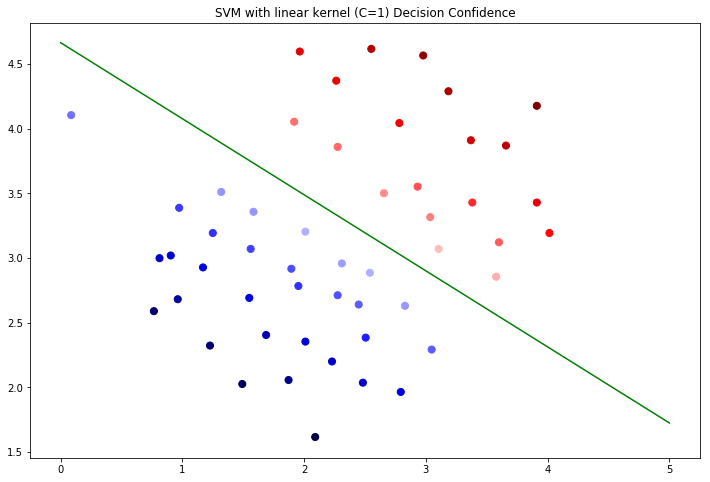

In [20]:
data['SVM 1 Confidence'] = svc.decision_function(data[['X1', 'X2']])
a = np.linspace(0,5,100)
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 1 Confidence'], cmap='seismic')
ax.set_title('SVM with linear kernel (C=1) Decision Confidence')
plt.plot(a, -(theta1[0] + theta1[1]*a)/theta1[2], c='g')

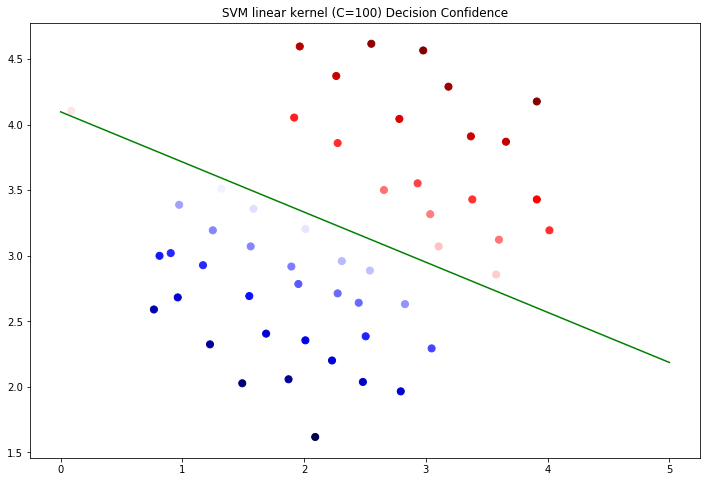

In [21]:
data['SVM 2 Confidence'] = svc2.decision_function(data[['X1', 'X2']])
a = np.linspace(0,5,100)

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(data['X1'], data['X2'], s=50, c=data['SVM 2 Confidence'], cmap='seismic')
ax.set_title('SVM linear kernel (C=100) Decision Confidence')
plt.plot(a, -(theta2[0] + theta2[1]*a)/theta2[2], c='g')

Ouais...c'est mignon les couleurs, mais... pas très clair tout ça... 
High five à ceux qui trouveront le moyen en plus de tracer la frontière de décision sur le graphe! 
Les autres pourront aller voir sur le PDF...

## 2- Kernels gaussiens

### Définition de la fonction

Le kernel est en fait une fonction qu'on utilise pour transformer les données avant de les fournir au SVM.
Commençons par écrire cette fonction.

In [22]:
def gaussian_kernel(x1, x2, sigma):
    
    return np.exp(-np.sum((x1- x2) ** 2, axis=1)/(2 * sigma ** 2))

Quelle valeur votre kernel renvoie-t-il si on lui donne deux vecteurs dont les valeurs seraient de [1, 2, 1] et [0,4,-1], pour un sigma de 2 ?

In [23]:
v1 = np.array([[1,2,1]])
v2 = np.array([[0,4,-1]])
sigma = 2

In [24]:
gaussian_kernel(v1, v2, sigma)

array([0.32465247])

Vous devriez obtenir environ 0.32464

Bonus: fixez x2, et essayez de voir avec différentes valeurs de x1, comment la mesure de similarité varie. Encore mieux si vous pouvez afficher vos résultats sur un graphe!

In [25]:
v11 = np.random.uniform(low=-5, high=5, size=(100,3))
v22 = np.tile(v2, (100,1))
v11[:5,:]

array([[ 0.91073093,  0.23840808,  0.1917205 ],
       [-0.84252389,  3.36386692, -0.81231854],
       [ 4.33638742, -4.5794659 , -1.33348936],
       [-2.9314751 ,  2.38825074, -4.01624624],
       [-2.53491768,  4.3370974 ,  0.88076445]])

In [26]:
v11[:5,:]

array([[ 0.91073093,  0.23840808,  0.1917205 ],
       [-0.84252389,  3.36386692, -0.81231854],
       [ 4.33638742, -4.5794659 , -1.33348936],
       [-2.9314751 ,  2.38825074, -4.01624624],
       [-2.53491768,  4.3370974 ,  0.88076445]])

In [27]:
result_kernel = gaussian_kernel(v11,v22,sigma)

In [28]:
result_kernel

array([1.28747740e-01, 8.66132814e-01, 9.48937073e-06, 7.91723693e-02,
       2.83770447e-01, 5.27658998e-01, 2.49941144e-03, 2.60718192e-02,
       3.38093486e-05, 6.27592623e-02, 2.01576371e-03, 2.54037503e-02,
       4.10607072e-02, 1.63290372e-02, 1.84534380e-02, 1.37363318e-05,
       7.68628779e-04, 1.90026898e-01, 1.42173740e-01, 4.65495523e-01,
       1.50761107e-01, 4.09221813e-04, 1.00780110e-03, 3.06447332e-02,
       1.20932031e-04, 2.71747405e-01, 8.31711206e-04, 1.45991315e-02,
       8.01993017e-02, 2.23813718e-01, 1.15318425e-06, 4.48131210e-02,
       3.06323722e-04, 1.50880386e-02, 2.98454029e-01, 1.07627671e-01,
       1.85020982e-02, 7.09701958e-05, 9.49167390e-03, 7.46332760e-03,
       7.05800600e-03, 1.46800541e-05, 2.96912502e-04, 1.32899367e-02,
       3.38139716e-01, 1.62629383e-03, 1.05592387e-02, 1.50204004e-03,
       1.23241782e-01, 4.88939434e-05, 6.82324130e-02, 1.36859978e-02,
       4.44979319e-01, 3.02665085e-01, 2.79282459e-01, 2.11669328e-01,
      

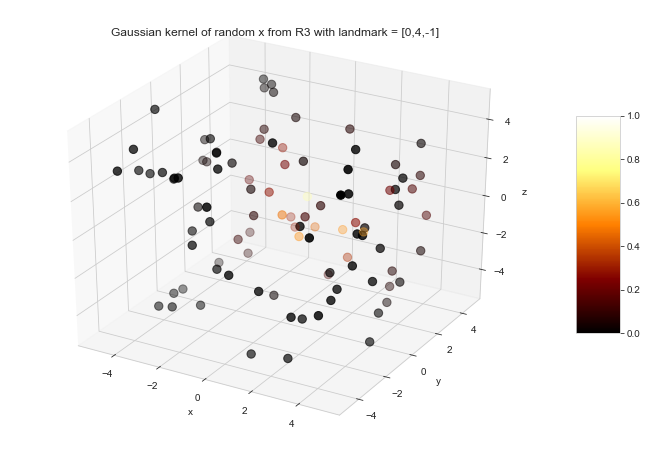

In [29]:
from mpl_toolkits.mplot3d import Axes3D
sns.set_style("whitegrid", {'axes.grid' : False})

fig = plt.figure(figsize=(12,8))
#ax = Axes3D(fig)
ax = fig.gca(projection='3d')
xs = v11[:,0]
ys = v11[:,1]
zs = v11[:,2]
ks = result_kernel
surf=ax.scatter(xs,ys,zs, s=70, c=ks, cmap='afmhot', vmin=0, vmax=1)
fig.colorbar(surf, shrink=0.5, aspect=5)

ax.set_title('Gaussian kernel of random x from R3 with landmark = [0,4,-1]')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')

plt.show()

### Chargement et manipulation des données

Les données sont dans le fichier ex6data2.mat....

In [30]:
raw_data = loadmat('ex6data2.mat')

Et pas encore dans un DataFrame dont les colonnes s'appellent X1, X2 et y...

In [31]:
raw_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:28:54 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[0.107143 , 0.60307  ],
        [0.093318 , 0.649854 ],
        [0.0979263, 0.705409 ],
        ...,
        [0.975806 , 0.439474 ],
        [0.989631 , 0.425439 ],
        [0.996544 , 0.414912 ]]),
 'y': array([[1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
        [1],
       

In [32]:
new_data = pd.DataFrame({'X1':raw_data['X'][:,0], 'X2':raw_data['X'][:,1], 'y':raw_data['y'].reshape(-1)})
new_data.head()

,X1,X2,y
0,0.107143,0.603070,1
1,0.093318,0.649854,1
2,0.097926,0.705409,1
3,0.155530,0.784357,1
4,0.210829,0.866228,1


Et il faut aussi séparer les exemples positifs et négatifs en deux ensemble différents pour que Matplotlib les affiche en deux couleurs différentes.

In [33]:
positive = new_data[new_data['y'] == 1]
negative = new_data[new_data['y'] == 0]

In [34]:
negative.head()

,X1,X2,y
193,0.372120,0.851608,0
194,0.351382,0.863304,0
195,0.305300,0.854532,0
196,0.323733,0.841374,0
197,0.289171,0.834064,0


### Visualisation des données

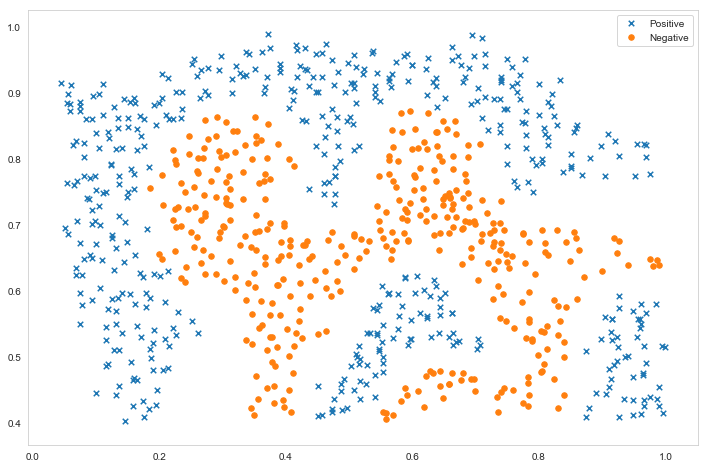

In [35]:
fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(positive['X1'], positive['X2'], s=30, marker='x', label='Positive')
ax.scatter(negative['X1'], negative['X2'], s=30, marker='o', label='Negative')
ax.legend()

### Entraînement du classifieur SVM

Scikit learn implémente un SVM qui a déjà un kernel gaussien, appelé RBF. 

**Transformer sigma en gamma**

Nous avons vu avec Andrew Ng que le kernel gaussien prend un paramètre sigma au carré. Or, le modèle de scikit learn fonctionne plutôt avec un paramètre gamma. Pour s'y retrouver un peu mieux, il serait bien de trouver une équivalence entre les deux. Vous trouverez dans la documentation de Scikit Learn la formule de leur kernel RBF et pourrez faire le rapprochement.
Ceux qui ne veulent pas s'embêter peuvent simplement fixer gamma à 10.

In [36]:
def gamma(sigma):
    return 1 / (2 * sigma ** 2)

**Créez un SVM avec un C de 100 pour commencer. Mettez le paramètre probability=True, nous en aurons beson pour afficher le graphique. **

In [37]:
svc_rbf = svm.SVC(C=100.0, probability=True, gamma=gamma(1))

**Entraînez le classifieur**

In [38]:
svc_rbf.fit(new_data[['X1','X2']], new_data['y'])

SVC(C=100.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma=0.5, kernel='rbf',
    max_iter=-1, probability=True, random_state=None, shrinking=True, tol=0.001,
    verbose=False)

### Visualisation de la classification

In [39]:
svc_rbf.predict_proba(new_data[['X1', 'X2']])

array([[0.07863539, 0.92136461],
       [0.08672588, 0.91327412],
       [0.11473073, 0.88526927],
       ...,
       [0.07531954, 0.92468046],
       [0.05199002, 0.94800998],
       [0.04084331, 0.95915669]])

Le graphique affiche des couleurs qui correspondent à la probabilité qu'un point soit classifié positif. Faites varier le paramètre sigma2 (ou gamma en l'occurrence) et notez son influence sur ces probabilités, notamment en bordure de la frontière de décision. 

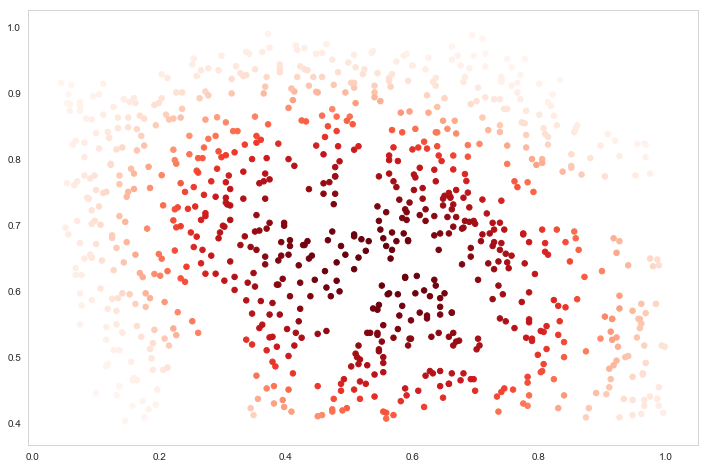

In [40]:
new_data['Probability'] = svc_rbf.predict_proba(new_data[['X1', 'X2']])[:,0]

fig, ax = plt.subplots(figsize=(12,8))
ax.scatter(new_data['X1'], new_data['X2'], s=30, c=new_data['Probability'], cmap='Reds')

## 3- Sélection des paramètres C et sigma

L'idée ici est d'entraîner un classifieur sur des données d'entraînement (X et y) avec un C et un sigma donné, puis de tester la performance sur des données dites de validation (Xval et yval). On choisit ensuite les meilleures valeurs.

### Chargez les données de ex6data3

In [41]:
raw_data = loadmat('ex6data3.mat')

In [42]:
raw_data

{'__header__': b'MATLAB 5.0 MAT-file, Platform: GLNXA64, Created on: Sun Nov 13 14:29:06 2011',
 '__version__': '1.0',
 '__globals__': [],
 'X': array([[-1.58986e-01,  4.23977e-01],
        [-3.47926e-01,  4.70760e-01],
        [-5.04608e-01,  3.53801e-01],
        [-5.96774e-01,  1.14035e-01],
        [-5.18433e-01, -1.72515e-01],
        [-2.92627e-01, -2.07602e-01],
        [-1.58986e-01, -4.38596e-02],
        [-5.76037e-02,  1.43275e-01],
        [-7.14286e-02,  2.71930e-01],
        [-2.97235e-01,  3.47953e-01],
        [-4.17051e-01,  2.01754e-01],
        [-4.40092e-01,  8.77193e-03],
        [-3.24885e-01, -3.21637e-02],
        [-2.46544e-01,  5.55556e-02],
        [-2.18894e-01,  2.01754e-01],
        [-3.43318e-01,  1.60819e-01],
        [-5.09217e-01,  7.89474e-02],
        [-3.84793e-01, -9.06433e-02],
        [-1.49770e-01,  1.25731e-01],
        [-1.95853e-01,  3.24561e-01],
        [-3.91705e-02, -2.19298e-01],
        [-1.08295e-01, -3.01170e-01],
        [-1.86636e-0

### Séparez les différentes données

In [43]:
train_x = raw_data['X']
train_y = raw_data['y'].reshape(-1)
test_x = raw_data['Xval']
test_y = raw_data['yval'].reshape(-1)
test_y.shape

(200,)

### Définissez des listes de valeurs de C et de sigma sur lesquelles vous allez itérer (0.01, 0.03, 0.1, 0.3.... 30)

In [78]:
C_values = np.random.uniform(low=0.0, high=50.0, size=(50,))
sigma_values = np.random.uniform(low=0.2, high=10, size=(50,))

In [79]:
C_values

array([31.15551698, 24.31699776,  0.42913255,  8.32216826, 34.94745929,
       12.86545741, 23.20319841, 22.48147839, 28.85932295, 27.38813398,
       23.30132612, 30.56777748, 48.77416779, 17.46019114, 23.20148883,
       27.66284705, 16.12068727, 30.25599041,  3.64081686, 16.74924377,
       46.63794122,  4.59635193, 40.4229428 , 28.08930648, 12.84557298,
        9.88405074, 25.79485044, 18.86433935, 41.74010922, 26.70411284,
       45.98885493, 48.11246236,  9.26591117, 43.81254809, 40.86339438,
       37.04923977, 26.50043927, 20.24278825, 12.94491015, 15.21524811,
       42.23200451, 16.68701272, 43.98879503, 12.35339462, 38.9807023 ,
       37.16127014, 20.59060151, 15.03683949, 33.53449688, 27.40141035])

### Testez systématiquement toutes les combinaisons possibles de C et sigma pour un classifieur donné et choisissez les meilleurs paramètres, et leur score associé.

Rappelez-vous, pour chaque paramétrage, ça se fait en deux étapes: d'abord on entraîne avec les données d'entraînement, puis on teste la performance avec les données de validation.

In [80]:
def metrics(result, test_y):
    TP = np.sum(result * test_y)
    FP = np.sum(result[test_y == 0])
    FN = np.sum(result[test_y == 1] == 0)
    return TP, FP, FN

def get_precision(TP, FP):
    return TP / (TP + FP)

def get_recall(TP, FN):
    return TP / (TP + FN)

def get_score(TP, FP, FN):
    P = get_precision(TP, FP)
    R = get_recall(TP, FN)
    return 2 * P * R / (P + R)

def training(C, sigma):
    svc = svm.SVC(C=C, gamma=gamma(sigma))
    svc.fit(train_x, train_y)
    test_result = svc.predict(test_x)
    TP, FP, FN = metrics(test_result, test_y)
    return (get_score(TP, FP, FN), C, sigma)


J_score = []
for C, s in zip(C_values, sigma_values):
    J_score.append(training(C, s))
    



In [81]:
sorted(J_score, key=lambda x: x[0], reverse=True)

[(0.941860465116279, 24.3169977564804, 0.41088548608855324),
 (0.9248554913294798, 42.23200451404522, 5.369546802185004),
 (0.9248554913294798, 27.401410350708172, 3.501699837791553),
 (0.9230769230769231, 48.77416778828973, 2.6402736356823917),
 (0.9230769230769231, 23.201488825428317, 1.6121207823901003),
 (0.9230769230769231, 46.637941223149895, 2.2650234126419857),
 (0.9230769230769231, 12.845572977218723, 1.2088399776798102),
 (0.9230769230769231, 25.794850435150906, 2.139384190016155),
 (0.9230769230769231, 43.812548092329585, 1.8994038684550374),
 (0.9230769230769231, 40.86339438223984, 2.273908307934983),
 (0.9230769230769231, 15.215248111670054, 1.3789183616082756),
 (0.9195402298850575, 34.947459292333605, 4.20033405215356),
 (0.9166666666666666, 45.98885493496817, 1.6558480817238033),
 (0.9166666666666666, 37.04923976745044, 0.9256718585031243),
 (0.9166666666666666, 43.988795030914346, 1.652914914482793),
 (0.9152542372881356, 4.596351929401826, 1.5868042934915385),
 (0.914